# Задача прогнозирования вероятности инсульта у пациента на основе таких входных параметров, как пол, возраст, различные заболевания и статус курения.

## Кратое описание болезни
**Инсульт** – острое нарушение мозгового кровообращения (ОНМК), вызывающее поражение и гибель нервных клеток.
Есть ряд патологий, присутствие которых существенно увеличивает угрозу возникновения ОНМК:
* атеросклероз сосудов головного мозга;
* мерцательная аритмия;
* инфаркт миокарда;
* высокое артериальное давление;
* варикозная болезнь;
* нарушение свертываемости крови;
* сахарный диабет;
* ожирение;
* малоподвижный образ жизни;
* курение, алкоголизм.

Риск развития этого грозного заболевания возрастает уже после 30 лет.
С ними связаны 10% всех летальных исходов (почти 6 млн. в год), что делает инсульт «причиной смерти №2» на планете.

<h2> Описание входных данных</h2>

* id - идентификатор;
* gender - пол: «Мужской», «Женский»;
* age - возраст;
* hypertension - 0, если у пациента нет гипертонии, 1, если у пациента гипертония;
* heart_disease - 0 если у пациента нет сердечных заболеваний, 1 если у пациента есть сердечные заболевания;
* ever_married - женат/замужем или неженат/не замужем;
* work_type - 
* Residence_type - вид проживания:"В селе" или "В Городе";
* avg_glucose_level - средний уровень глюкозы в крови;
* bmi - индекс массы тела;
* smoking_status -  статус курения: "ранее курил", "никогда не курил", "курит" или «Неизвестно»*
* stroke - 1, если у пациента был инсульт, или 0, если нет;

In [1]:
# my data set "https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download"

In [143]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [144]:
ds = pd.read_csv("healthcare-dataset-stroke-data.csv")

**Посмотрим информацию о наборе данных**

In [145]:
ds.head(2)
ds.info()
ds.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Посмотрим на пропуски**

In [146]:
ds.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [147]:
len(ds[(ds.bmi.isnull() == True) & (ds.stroke == 1)])

40

По всем данным (есть пропуски - 201 в bmi) 40 из которых с инсультом. Необходимо обработать пропуски. Удалять их нельзя потому что и так мало объектов с инсультом, выборка несбалансирована.

### Обработаем пропуски

In [148]:
import random

In [149]:
ds.bmi.fillna(random.randint(24,33), inplace=True)

**Обработаем признаки в логике накопления вредности для инсульта (1 - логически будет влиять на вероятность инсульта в сторону повышения вероятности)**

Я считаю, что информация о работе в том виде в котором она представлена, является не информативной, то удалим столбик *work_type.*

In [150]:
ds.drop(['work_type'], axis=1, inplace=True)

In [151]:
from sklearn.preprocessing import OrdinalEncoder

In [152]:
ord_enc = OrdinalEncoder()
ds[['ever_married']] = ord_enc.fit_transform(ds[['ever_married']])
cat_smoke = ['never smoked', 'Unknown', 'formerly smoked', 'smokes']
cat_life = ['Rural', 'Urban']

In [153]:
ds[['smoking_status']] = OrdinalEncoder(categories=[cat_smoke]).fit_transform(ds[['smoking_status']])
ds[['Residence_type']] = OrdinalEncoder(categories=[cat_life]).fit_transform(ds[['Residence_type']])

## Посмотрим отдельно мужчин и отдельно женщин

Так как разнае организмы у мужчины и женщина должно быть разное влияние рисков

In [154]:
ds_m = ds[ds['gender']=='Male']
ds_m.drop(['id'], axis=1, inplace=True)
ds_fm = ds[ds['gender']=='Female']
ds_fm.drop(['id'], axis=1, inplace=True)

c:\users\днс\python\python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [155]:
ds_m.stroke.sum()
ds_fm.stroke.sum()

141

В наборе данных получается - **108 мужчин из 2115** с инсультом и

**141 женщина из 2994** с инсультом.
Разделение будем считать примерно равнозначным

In [156]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'График мужчин avg_glucose_level от bmi')

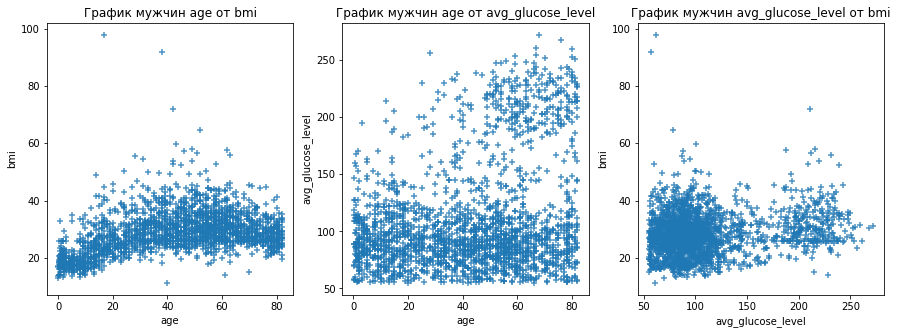

In [157]:
plt.rcParams ['figure.figsize'] = [15, 5]
plt.subplot (1, 3, 1)
plt.scatter(ds_m['age'], ds_m['bmi'], alpha=0.8, marker='+')
plt.xlabel('age')
plt.ylabel("bmi")
plt.title ("График мужчин age от bmi")

plt.subplot (1, 3, 2)
plt.scatter(ds_m['age'], ds_m['avg_glucose_level'], alpha=0.8, marker='+')
plt.xlabel('age')
plt.ylabel("avg_glucose_level")
plt.title ("График мужчин age от avg_glucose_level")

plt.subplot (1, 3, 3)
plt.scatter(ds_m['avg_glucose_level'], ds_m['bmi'], alpha=0.8, marker='+')
plt.xlabel('avg_glucose_level')
plt.ylabel("bmi")
plt.title ("График мужчин avg_glucose_level от bmi")

Text(0.5, 1.0, 'График женщин avg_glucose_level от bmi')

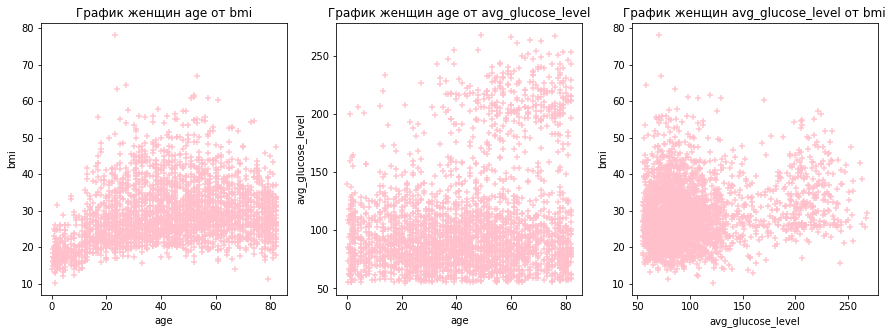

In [158]:
plt.rcParams ['figure.figsize'] = [15, 5]
plt.subplot (1, 3, 1)
plt.scatter(ds_fm['age'], ds_fm['bmi'], alpha=0.9, color='pink', marker='+')
plt.xlabel('age')
plt.ylabel("bmi")
plt.title ("График женщин age от bmi")

plt.subplot (1, 3, 2)
plt.scatter(ds_fm['age'], ds_fm['avg_glucose_level'], alpha=0.9, color='pink', marker='+')
plt.xlabel('age')
plt.ylabel("avg_glucose_level")
plt.title ("График женщин age от avg_glucose_level")

plt.subplot (1, 3, 3)
plt.scatter(ds_fm['avg_glucose_level'], ds_fm['bmi'], alpha=0.9, color='pink', marker='+')
plt.xlabel('avg_glucose_level')
plt.ylabel("bmi")
plt.title ("График женщин avg_glucose_level от bmi")

Text(0.5, 1.0, 'Гистограма мужчин bmi')

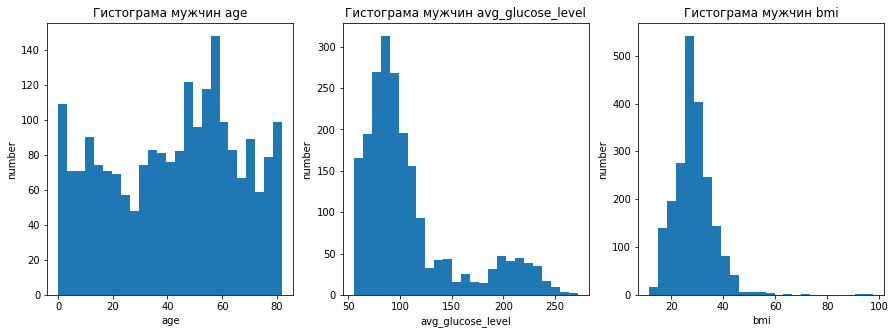

In [159]:
plt.subplot (1, 3, 1)
plt.hist(ds_m['age'], bins=25)
plt.title ("Гистограма мужчин age")
plt.xlabel('age')
plt.ylabel("number")

plt.subplot (1, 3, 2)
plt.hist(ds_m['avg_glucose_level'], bins=25)
plt.xlabel('avg_glucose_level')
plt.ylabel("number")
plt.title ("Гистограма мужчин avg_glucose_level")

plt.subplot (1, 3, 3)
plt.hist(ds_m['bmi'], bins=25)
plt.xlabel('bmi')
plt.ylabel("number")
plt.title ("Гистограма мужчин bmi")

Text(0.5, 1.0, 'Гистограма женщин bmi')

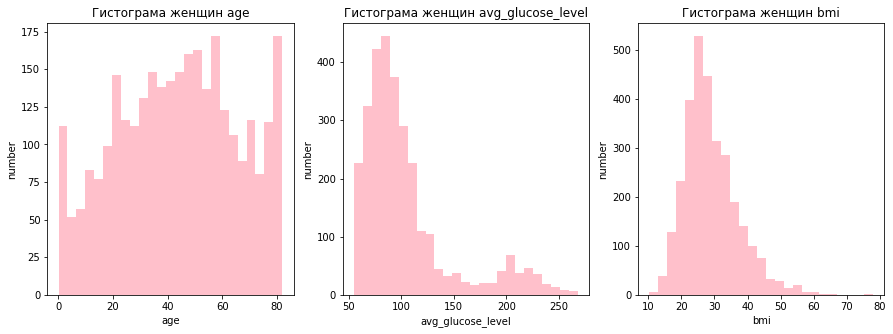

In [160]:
plt.subplot (1, 3, 1)
plt.hist(ds_fm['age'], bins=25, color='pink')
plt.title ("Гистограма женщин age")
plt.xlabel('age')
plt.ylabel("number")

plt.subplot (1, 3, 2)
plt.hist(ds_fm['avg_glucose_level'], bins=25, color='pink')
plt.xlabel('avg_glucose_level')
plt.ylabel("number")
plt.title ("Гистограма женщин avg_glucose_level")

plt.subplot (1, 3, 3)
plt.hist(ds_fm['bmi'], bins=25, color='pink')
plt.xlabel('bmi')
plt.ylabel("number")
plt.title ("Гистограма женщин bmi")

Так как визуально можно отметить, что графики мужчин и женщин очень похожи (за исключением возраста), то такой признак как **gender не будем учитывать**.

In [161]:
ds.drop(['gender', 'id'], axis=1, inplace=True)

Так как риск развития этого заболевания возрастает после 30 лет, то я считаю, что можно удалить объекты с возрастом до 30 лет

Text(0.5, 1.0, 'График женщин age от stroke')

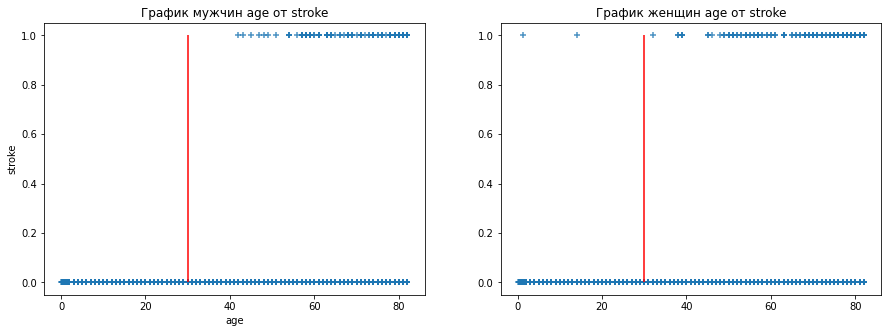

In [162]:
plt.subplot (1, 2, 1)
plt.scatter(ds_m['age'], ds_m['stroke'], alpha=0.8, marker='+')
plt.vlines(30, ymin=0, ymax=1, color = 'r')
plt.xlabel('age')
plt.ylabel("stroke")
plt.title ("График мужчин age от stroke")

plt.subplot (1, 2, 2)
plt.scatter(ds_fm['age'], ds_fm['stroke'], alpha=0.8, marker='+')
plt.vlines(30, ymin=0, ymax=1, color = 'r')
plt.title ("График женщин age от stroke")

In [163]:
ds = ds[(ds.age >= 35)]

**Сконструируем новый признак как сумму признаков кроме *avg_glucose_level* и *bmi***

In [164]:
ds['f_sum'] = ds.apply(lambda i: i.age + i.hypertension + i.heart_disease + i.ever_married + i.Residence_type + i.smoking_status, axis=1)

In [165]:
ds.drop(['age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status'], axis=1, inplace=True)

In [166]:
ds.corr()

,avg_glucose_level,bmi,stroke,f_sum
avg_glucose_level,1.000000,0.150417,0.113467,0.172519
bmi,0.150417,1.000000,-0.037032,-0.123195
stroke,0.113467,-0.037032,1.000000,0.234226
f_sum,0.172519,-0.123195,0.234226,1.000000


In [169]:
ds

,avg_glucose_level,bmi,stroke,f_sum
0,228.69,36.6,1,72.0
1,202.21,26.0,1,62.0
2,105.92,32.5,1,82.0
3,171.23,34.4,1,54.0
4,174.12,24.0,1,81.0
...,...,...,...,...
5105,83.75,26.0,0,83.0
5106,125.20,40.0,0,83.0
5107,82.99,30.6,0,36.0
5108,166.29,25.6,0,54.0


In [170]:
y = ds['stroke']
X = ds.drop(['stroke'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3000, test_size=265, random_state=12)

**Стандартизируем данные**

In [171]:
from sklearn.preprocessing import StandardScaler

In [172]:
scaler = StandardScaler()

In [173]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

**Проведем нормальзацию**

In [176]:
from sklearn.preprocessing import Normalizer

In [177]:
transformer_X_train_s = Normalizer().fit_transform(X_train_s)
transformer_X_test_s = Normalizer().fit_transform(X_test_s)

## Пострим просутю модель классификации - логистическую регрессию

In [184]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score

 <text> В условиях несбалансированности классов, необходимо отслеживать метрики precision и recall</text> <br>
 <img src='https://habrastorage.org/getpro/habr/post_images/164/93b/c89/16493bc899f7275f3b5ff8d45a3ed2e2.svg'>

<img src='https://habrastorage.org/getpro/habr/post_images/258/4e7/8f3/2584e78f32225eade5cb8b1b4a665193.svg'>

In [179]:
from sklearn.linear_model import LogisticRegression

In [213]:
classifier_Log = LogisticRegression(penalty='l2', C=1, class_weight='balanced', random_state=4838)

In [214]:
classifier_Log.fit(transformer_X_train_s, y_train)

LogisticRegression(C=1, class_weight='balanced', random_state=4838)

In [215]:
res_Log = classifier_Log.predict(transformer_X_test_s)

In [216]:
cm_Log = confusion_matrix(y_test, res_Log)
cm_Log

array([[142,  99],
       [  1,  23]], dtype=int64)

In [217]:
prec_Log = precision_score(y_test, res_Log, average='binary')
recall_Log = recall_score(y_test, res_Log, average='binary')
[prec_Log, recall_Log]

[0.1885245901639344, 0.9583333333333334]

In [218]:
print(f'model accuracy score: {accuracy_score(y_test, res_Log)}')
print(f'model AUC score: {roc_auc_score(y_test, res_Log)}')
print(f'model precision score: {prec_Log}')
print(f'model recall score: {recall_Log}')

model accuracy score: 0.6226415094339622
model AUC score: 0.7737724757952974
model precision score: 0.1885245901639344
model recall score: 0.9583333333333334


## Построим модель RandomForest

In [220]:
from sklearn.ensemble import RandomForestClassifier

In [221]:
classifier_RF = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=4838, class_weight='balanced')
classifier_RF.fit(transformer_X_train_s, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=500,
                       random_state=4838)

In [223]:
res_RF = classifier_RF.predict(transformer_X_test_s)
cm_RF = confusion_matrix(y_test, res_RF)
cm_RF

array([[174,  67],
       [  4,  20]], dtype=int64)

In [224]:
prec_RF = precision_score(y_test, res_RF, average='binary')
recall_RF = recall_score(y_test, res_RF, average='binary')
[prec_RF, recall_RF]

[0.22988505747126436, 0.8333333333333334]

In [225]:
print(f'model accuracy score: {accuracy_score(y_test, res_RF)}')
print(f'model AUC score: {roc_auc_score(y_test, res_RF)}')
print(f'model precision score: {prec_RF}')
print(f'model recall score: {recall_RF}')

model accuracy score: 0.7320754716981132
model AUC score: 0.7776625172890734
model precision score: 0.22988505747126436
model recall score: 0.8333333333333334


**Проведем балансировку данных**

In [226]:
from imblearn.over_sampling import RandomOverSampler

In [227]:
ros = RandomOverSampler(random_state=4838, sampling_strategy ='minority')

In [228]:
X_resampled, y_resampled = ros.fit_resample(transformer_X_train_s, y_train)
X_resampled_test, y_resampled_test = ros.fit_resample(transformer_X_test_s, y_test)

## Построим модель SVM

In [234]:
from sklearn.svm import SVC

In [235]:
classifier_SVC = SVC(gamma='auto', C=1.0, degree=3)

In [236]:
classifier_SVC.fit(X_resampled, y_resampled)

SVC(gamma='auto')

In [237]:
res_SVC = classifier_SVC.predict(X_resampled_test)

In [238]:
cm_SVC = confusion_matrix(y_resampled_test, res_SVC)
cm_SVC

array([[146,  95],
       [ 20, 221]], dtype=int64)

In [239]:
prec_SVC = precision_score(y_resampled_test, res_SVC, average='binary')
recall_SVC = recall_score(y_resampled_test, res_SVC, average='binary')
[prec_SVC, recall_SVC]

[0.6993670886075949, 0.91701244813278]

In [240]:
print(f'model accuracy score: {accuracy_score(y_resampled_test, res_SVC)}')
print(f'model AUC score: {roc_auc_score(y_resampled_test, res_SVC)}')
print(f'model precision score: {prec_SVC}')
print(f'model recall score: {recall_SVC}')

model accuracy score: 0.7614107883817427
model AUC score: 0.7614107883817427
model precision score: 0.6993670886075949
model recall score: 0.91701244813278


In [268]:
print('Evaluation SVC:\n', classification_report(y_resampled_test, res_SVC))

Evaluation SVC:
               precision    recall  f1-score   support

           0       0.88      0.61      0.72       241
           1       0.70      0.92      0.79       241

    accuracy                           0.76       482
   macro avg       0.79      0.76      0.76       482
weighted avg       0.79      0.76      0.76       482



## Построим модель Random forest

In [241]:
classifier_RF = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=4838)

In [242]:
classifier_RF.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=3, n_estimators=500, random_state=4838)

In [243]:
res_RF = classifier_RF.predict(X_resampled_test)
cm_RF = confusion_matrix(y_resampled_test, res_RF)
cm_RF

array([[160,  81],
       [ 34, 207]], dtype=int64)

In [244]:
prec_RF = precision_score(y_resampled_test, res_RF, average='binary')
recall_RF = recall_score(y_resampled_test, res_RF, average='binary')
[prec_RF, recall_RF]

[0.71875, 0.8589211618257261]

In [245]:
print(f'model accuracy score: {accuracy_score(y_resampled_test, res_RF)}')
print(f'model AUC score: {roc_auc_score(y_resampled_test, res_RF)}')
print(f'model precision score: {prec_RF}')
print(f'model recall score: {recall_RF}')

model accuracy score: 0.7614107883817427
model AUC score: 0.7614107883817428
model precision score: 0.71875
model recall score: 0.8589211618257261


In [267]:
print('Evaluation RF:\n', classification_report(y_resampled_test, res_RF))

Evaluation RF:
               precision    recall  f1-score   support

           0       0.82      0.66      0.74       241
           1       0.72      0.86      0.78       241

    accuracy                           0.76       482
   macro avg       0.77      0.76      0.76       482
weighted avg       0.77      0.76      0.76       482



## Построим модель Logistic regression

In [248]:
classifier_Log = LogisticRegression(penalty='l2', C=1, class_weight='balanced', random_state=4838)

In [253]:
classifier_Log.fit(X_resampled, y_resampled)

LogisticRegression(C=1, class_weight='balanced', random_state=4838)

In [254]:
res_Log = classifier_Log.predict(X_resampled_test)

In [256]:
cm_Log = confusion_matrix(y_resampled_test, res_Log)
cm_Log

array([[142,  99],
       [  9, 232]], dtype=int64)

In [257]:
prec_Log = precision_score(y_resampled_test, res_Log, average='binary')
recall_Log = recall_score(y_resampled_test, res_Log, average='binary')
[prec_Log, recall_Log]

[0.7009063444108762, 0.9626556016597511]

In [258]:
print(f'model accuracy score: {accuracy_score(y_resampled_test, res_Log)}')
print(f'model AUC score: {roc_auc_score(y_resampled_test, res_Log)}')
print(f'model precision score: {prec_Log}')
print(f'model recall score: {recall_Log}')

model accuracy score: 0.7759336099585062
model AUC score: 0.7759336099585064
model precision score: 0.7009063444108762
model recall score: 0.9626556016597511


In [260]:
 from sklearn.metrics import classification_report

In [266]:
print('Evaluation Log):\n', classification_report(y_resampled_test, res_Log))

Evaluation Log):
               precision    recall  f1-score   support

           0       0.94      0.59      0.72       241
           1       0.70      0.96      0.81       241

    accuracy                           0.78       482
   macro avg       0.82      0.78      0.77       482
weighted avg       0.82      0.78      0.77       482



## Выводы

1. Можно с уверенностью сказать, что мало данных. При их балансировки, искусственное увеличение данных, заметно повышает качество модели.
2. Не плохие результаты показали все три модели (логистическая регрессия, случайный лес и метод опорных векторов). Затрудняюсь сделать твердый выбор, но предпочтение отдал бы случайному лесу, так как метрика precision для класса "1 - инсульт" выше всех остальных моделей.
3. Стоит отметить, что для обучения модели использовались все признаки, кроме *work_type и gender*. *Gender* был отброшен так как данные показали, что большого отличия мужчины от женщины данные не имеют. *Work_type* обязан влиять на вероятность инсульта, но в том виде в котором он представлен его нельзя использовать.
